# Fourier Trasnform

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Recall integrals

In [2]:
def integral_trapezoidal(data):
    a = 0
    for i in range(len(data[0]) - 1):
        a = a + ( data[1,i+1] + data[1,i] ) / 2 * ( data[0,i+1] - data[0,i] )
    return a

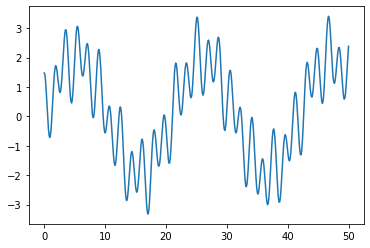

In [3]:
t_list = np.linspace(0, 50, 501)

freq1 = 2.0
freq2 = 0.3
freq3 = 3.5

y_list = 0.5*np.cos(t_list*freq1+0.3) + 2.0*np.sin(t_list*freq2) + 1.0*np.cos(t_list*freq3)

data = np.array([t_list, y_list])
plt.plot(data[0], data[1])

In [4]:
integral_trapezoidal(data)

11.373146764083113

## Fourier transform to find characteristic frequencies

\\(
\tilde{y}(\omega) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} y(t) e^{i\omega t}\mathrm{d}t
\\)

In [5]:
omega = 0.3

integrand = np.array([t_list, 1/np.sqrt(2*np.pi) * y_list * np.exp(1j*omega*t_list)])

print(abs(integral_trapezoidal(integrand))**2)

420.16655955096377


In [6]:
ft = np.array(
    [[om,
    integral_trapezoidal( np.array([t_list, 1/np.sqrt(2*np.pi) * y_list * np.exp(1j*om*t_list)]) )] 
     for om in np.linspace(0, 10, 1001)
    ]
)

In [7]:
ft[:,0]

array([ 0.  +0.j,  0.01+0.j,  0.02+0.j, ...,  9.98+0.j,  9.99+0.j,
       10.  +0.j])

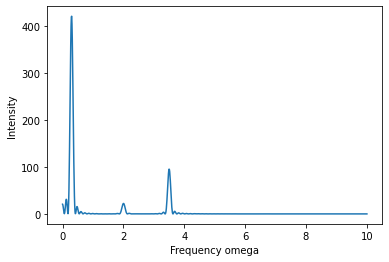

In [8]:
plt.xlabel('Frequency omega')
plt.ylabel('Intensity')

plt.plot(ft[:,0].real, abs(ft[:,1])**2)

In [9]:
ft[25:35,0]

array([0.25+0.j, 0.26+0.j, 0.27+0.j, 0.28+0.j, 0.29+0.j, 0.3 +0.j,
       0.31+0.j, 0.32+0.j, 0.33+0.j, 0.34+0.j])

In [10]:
abs(ft[25:35,1])**2

array([257.64250453, 314.4191087 , 363.06038133, 398.91013973,
       418.53765769, 420.16655955, 403.87504871, 371.54322565,
       326.56272101, 273.35955584])

## Use numpy module: Fast Fourier transform (FFT)

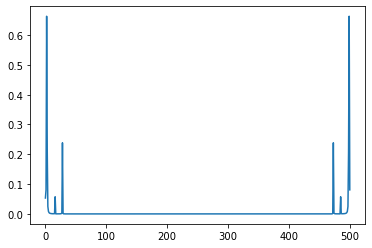

In [11]:
ft = np.fft.fft(y_list)/len(y_list)

plt.plot(abs(ft)**2) 

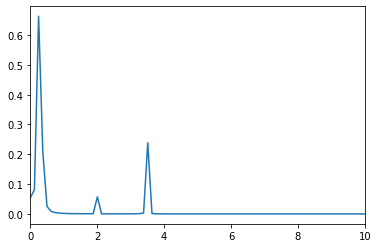

In [12]:
frequencies = np.arange(len(y_list)) / ( len(y_list)*0.1 )

plt.xlim([0, 10])
plt.plot( frequencies*2*np.pi, abs(ft)**2 ) 